In [1]:
# Script montrant un exemple de minimisation de fonction 2D au moyen d'une méthode basée sur la descente du gradient.
#
# Le but est de produire une figure similaire à celle de murphy-fig8_2a mentionnée dans la présentation 
# Apprentissage supervisé pour la classification de Christian Gagné pour l'École en ligne en apprentissage automatique.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
import numpy as np
from mpl_toolkits import mplot3d

In [2]:
# Partie I: Définition du problème 

In [3]:
# Fonction objectif à minimiser; la position du minimum se trouve à l'origine [0,0]
a = 0.01
b = 0.04
c = 0.01

# Fonction à minimiser
def f(x,y):
    return a*x**2 + b*y**2 + c*x*y

# Gradient 2D de la fonction
def Grad_f(x,y):
    gx = 2*a*x + c*y
    gy = 2*b*y + c*x
    return np.array([gx,gy]) 

In [4]:
# Partie II: Description de la méthode d'optimisation utilisée

In [5]:
# Algorithme de minimisation. On cherche à déterminer les valeurs des paramètres x et y qui minimisent la fonction objectif.
# On peut visualiser les 2 paramètres comme une position X=[x,y] dans l'espace des paramètres.

def Gradient_Descent(Grad,x,y, gamma = 0.00125, epsilon=0.0001, nMax = 10000 ):
    # Initialization
    i = 0
    iter_x, iter_y, iter_count = np.empty(0), np.empty(0), np.empty(0)
    X = np.array([x,y])
    dX = 10
    
    # la position du minimum de la fonction est estimée par itérations successives.
    # La boucle est exécutée tant que les variations de position dX d'une itération à l'autre sont supérieures
    # à une valeur de tolérance epsilon. 
    while np.linalg.norm(dX) > epsilon and i < nMax:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        
        # Mise à jour des positions
        X_prev = X
        X = X - gamma * Grad(x,y)
        
        # Variation de position
        dX = X - X_prev
        x,y = X[0], X[1]

    return X, iter_x,iter_y, iter_count

In [6]:
# Valeurs approximatives de la position du minimum de la fonction.
x_guess=-2
y_guess=-2

# Raffine cet estimé de la position du minimum de la fonction
root,iter_x,iter_y, iter_count = Gradient_Descent(Grad_f,x_guess,y_guess,1)

In [7]:
# Partie III: Affichage des résultats

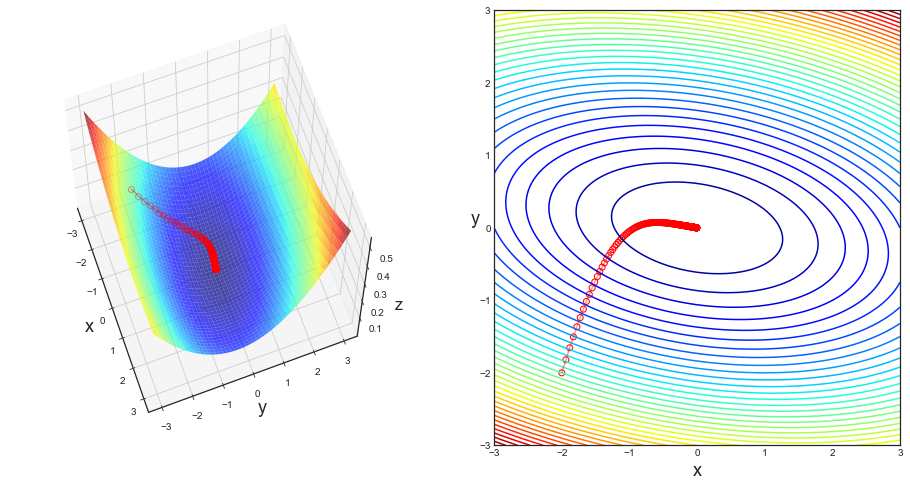

In [8]:
# Calcul la fonction z = f(x,y) sur un grillage en x,y
x = np.linspace(-3,3,250)
y = np.linspace(-3,3,250)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


%matplotlib inline
fig = plt.figure(figsize = (16,8))

# Génère la surface 3D (x,y,z)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .7, edgecolor = 'none' )

# Ajoute la trajectoire d'optimisation en 3D
ax.plot(iter_x,iter_y, f(iter_x,iter_y),color = 'r', marker = 'o', alpha = .4, fillstyle='none')

ax.view_init(65, 340)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=16)


# Affiche les contours de la fonction en 2D (x,y)
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')

# Ajoute la trajectoire d'optimisation en 2D
ax.scatter(iter_x,iter_y,color = 'r', marker = 'o', facecolors='none')
ax.plot(iter_x,iter_y, color = 'r', alpha = .4, fillstyle='none')
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y',rotation=0, fontsize=18)

plt.savefig('similar_to_murphy-fig8_2a.svg', format='svg')
#plt.savefig('similar_to_murphy-fig8_2a.svg', format='png')
plt.show()